Step 1: Data Preprocessing
      (Load and Preprocess the Images)

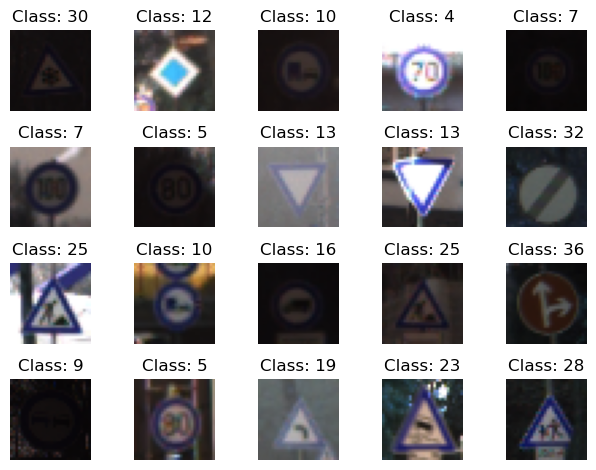

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
# Define paths
data_dir =  r'C:\\Users\\somay\\Downloads\\Autonomos'
train_path = 'Train'
test_path = 'Test'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 30, 30

def load_images_from_folder(folder):
    images = []
    labels = []
    for class_id in range(43):  # There are 43 classes
        class_path = os.path.join(folder, str(class_id))
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(class_id)
    return np.array(images), np.array(labels)

# Load training images
X_train, y_train = load_images_from_folder(train_path)
# Normalize images
X_train = X_train / 255.0

# Display 20 random sample images
random_samples = random.sample(range(X_train.shape[0]), 20)
for i, idx in enumerate(random_samples):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(f'Class: {y_train[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


Step 2: Building the Model (Create a CNN Model)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\somay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Training the Model

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2852 - loss: 2.5050 - val_accuracy: 0.0000e+00 - val_loss: 24.2038
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8751 - loss: 0.3976 - val_accuracy: 7.6511e-04 - val_loss: 24.6645
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9455 - loss: 0.1777 - val_accuracy: 0.0000e+00 - val_loss: 24.3309
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9681 - loss: 0.1085 - val_accuracy: 6.3759e-04 - val_loss: 20.4146
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9779 - loss: 0.0767 - val_accuracy: 0.0000e+00 - val_loss: 30.5035
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9801 - loss: 0.0637 - val_accuracy: 1.2752e-04 - val_loss: 26.2265
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.0000e+00 - val_loss: 29.6301
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy:

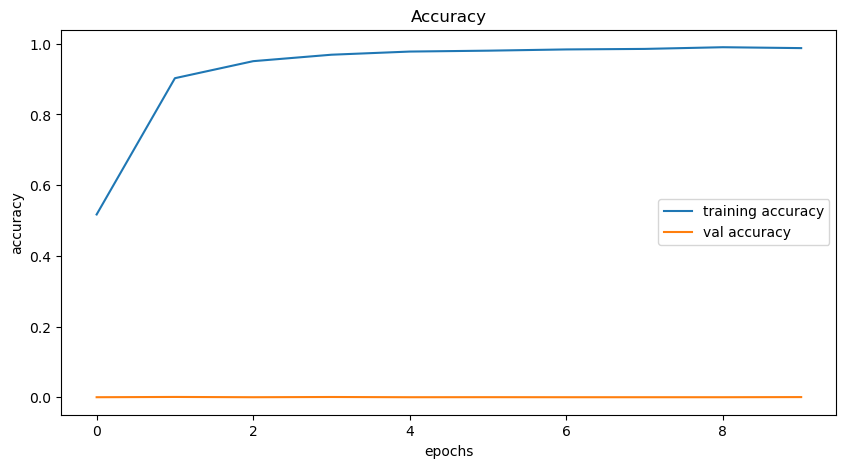

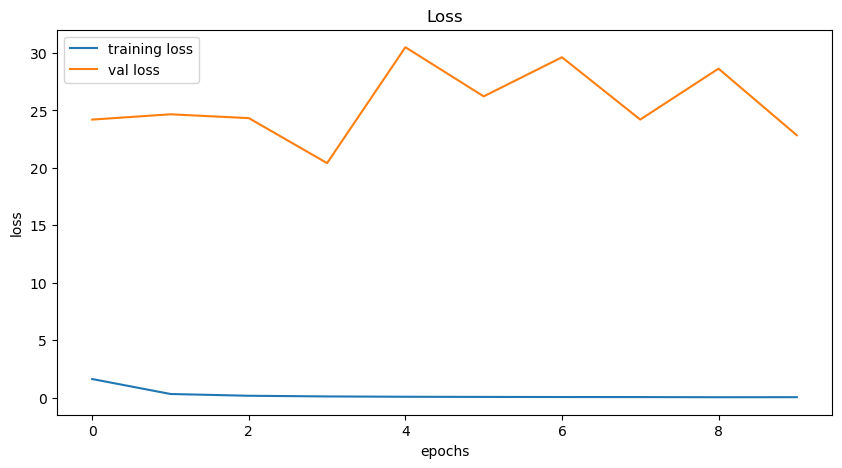

In [9]:
# Plotting performance graphs
plt.figure(0, figsize=(10, 5))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1, figsize=(10, 5))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [17]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import cv2
from PIL import Image
import numpy as np

# Importing the test dataset
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data=[]

# Retreiving the images
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test=np.array(data)
X_test = X_test/255

# Assuming 'model' is your trained model
pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)



395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data accuracy:  76.6825019794141
